In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

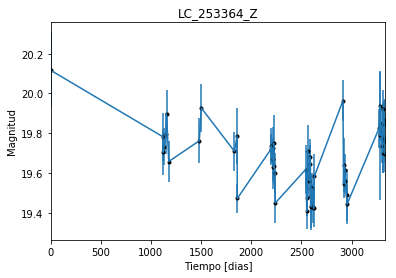

In [2]:
data = np.genfromtxt('LC_253364_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_253364_Z')
plt.savefig("LC_253364_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

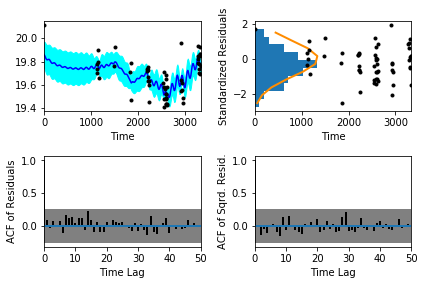

In [5]:
sample.assess_fit()

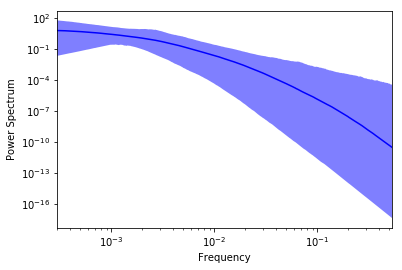

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

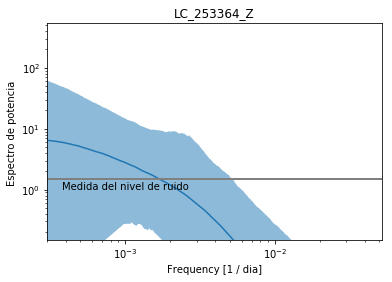

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_253364_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_253364_Z')

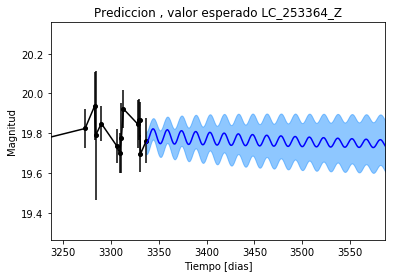

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_253364_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_253364_Z')

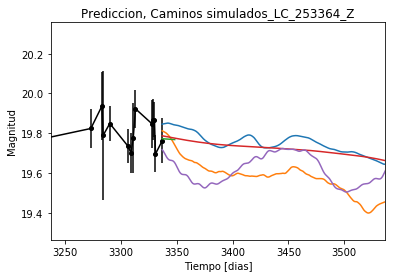

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_253364_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


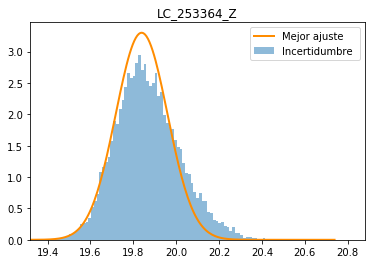

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_253364_Z')
plt.savefig("Mejor_ajuste_LC_253364_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_253364_Z')

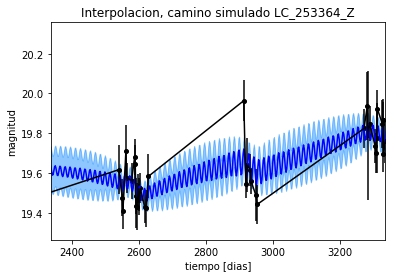

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_253364_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_253364_Z')

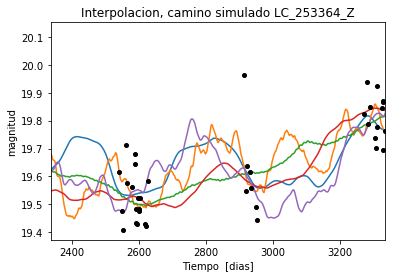

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_253364_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 709.643299874
Median: 0.00893807038462
Standard deviation: 0.18496085475
68% credibility interval: [ 0.0009472   0.15114554]
95% credibility interval: [  3.57107136e-04   7.34002977e-01]
99% credibility interval: [  3.10022883e-04   9.80510651e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 544.028627947
Median: 0.00253204848485
Standard deviation: 0.0912956398026
68% credibility interval: [ 0.00055171  0.02767354]
95% credibility interval: [ 0.00032421  0.30599739]
99% credibility interval: [  3.04858435e-04   6.57546615e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 613.497203418
Median: 0.039213061578
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1082.34596922
Median: 67.2316410418
Standard deviation: 1.51523983043
68% credibility interval: [ 65.54691394  68.22445932]
95% credibility interval: [ 63.04102521  68.81401808]
99% credibility interval: [ 61.09275631  69.21890134]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 314.053594593
Median: 0.80549861236
Standard deviation: 2.21985774734
68% credibility interval: [ 0.08402844  3.93356312]
95% credibility interval: [ 0.01666288  7.56693089]
99% credibility interval: [  9.89265057e-03   1.06020188e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 825.776776849
Median: 0.523181278463
Standard deviation: 9.93190164518
68% credibility interval: [ 0.02129897  9.90315506]
95% credibility interval: [  1.36

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0424769
Median: 2.21862097595e-23
Standard deviation: 5.13347863157e+58
68% credibility interval: [  9.73221327e-80   2.66808159e-01]
95% credibility interval: [  3.08056563e-115   3.19283460e+037]
99% credibility interval: [  8.61843790e-130   3.38411957e+052]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1663.95769154
Median: 19.7027972798
Standard deviation: 0.0868781696252
68% credibility interval: [ 19.64039788  19.783745  ]
95% credibility interval: [ 19.56451295  19.91147457]
99% credibility interval: [ 19.48220911  20.04329043]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 758.349341969
Median: 0.0174865151004
Standard deviation: 0.260049459363
68% credibility interval: [ 0.          0.39953804]
95% credibility interval: [ 0.          0.92599133]
99% credibility interval: [ 0.          1.02804008]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 758.349341969
Median: 0.0174865151004
Standard deviation: 0.260049459363
68% credibility interval: [ 0.          0.39953804]
95% credibility interval: [ 0.          0.92599133]
99% credibility interval: [ 0.          1.02804008]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 528.211281852
Median: 0.0
Standard deviation: 0.00109246487529
68% cre

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1082.34596922
Median: 67.2316410418
Standard deviation: 1.51523983043
68% credibility interval: [ 65.54691394  68.22445932]
95% credibility interval: [ 63.04102521  68.81401808]
99% credibility interval: [ 61.09275631  69.21890134]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1177.60064161
Median: 0.0235734013091
Standard deviation: 0.0313758167159
68% credibility interval: [ 0.01197415  0.04890759]
95% credibility interval: [ 0.00674364  0.11443579]
99% credibility interval: [ 0.00461613  0.19143599]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1868.63422127
Median: 0.994617882006
Standard deviation: 0.159374103369
68% credibility interval: [ 0.85593138  1.16499732]
95% credibility interval: [ 0.73721418  1.35921716]
99% credibility interval: [ 0.66588878  1.49946526]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 943.917405291
Median: 0.000246872113776
Standard deviation: 0.238551906659
68% credibility interval: [  3.02357752e-07   2.14449331e-02]
95% credibility interval: [  7.65577042e-41   5.09947733e-01]
99% credibility interval: [  3.50428550e-56   1.51584513e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 709.643299874
Median: (-0.0561595525152+0j)
Standard deviation: 2.0050769498
68% credibility interval: [-0.94967544+0.j         -0.00595141-3.73042777j]
95% credibility interval: [ -4.61187672e+00-0.05662352j  -2.24377031e-03-0.0141954j ]
99% credibility interval: [ -6.16073012e+00+0.j          -1.94793123e-03-0.01461573j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 544.028627947
Median: (-0.0159093298371+0.0136391342968j)
Standard deviation: 1.73170577375
68% credibility interval: [-0.1738780+5.05907939j -0.0034665+0.03110971j]
95% credibility interval: [-1.92263831+4.03407412j -0.00203709+0.01050793j]
99% credibility interval: [ -4.13148723e+00+4.17177959j  -1.91548204e-03+0.j        ]
Posterior summary for param